# Viz Group Project -  Game of Thrones
## - Revised Version
**Group 5:** Sydney Akers, Yan Cao, Kailin Hu, Jun Xing

## Background/ Purpose:
**Purpose**  
As we all know, Game of Thrones is one of the most popular TV shows on HBO (and on air in general). Thus, the purpose of this project is to explore what makes this show so popular and how viewers react to different aspects of the show. We would like to first analyze what affects ratings and viewership, and then to also get an idea of how fans relate to major themes and trends.

**Audience**  
Since there will be many complex storylines involved in the analysis, our intended audience is those who have already watched Game of Thrones, and/or those who at least have a general idea about what's happening in the TV show. The Game of Thrones writing team seeking insights on fans' reception of plotlines could also be a potential audience.

In [0]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## 3 Key Findings

## Finding 1: Impact of Major Storylines on Viewership and Ratings



In this part, we're going to conduct a general exploration of all 7 seasons of Game of Thrones. We would like to explore the impacts of major storylines on viewership and ratings. 

### Goal, Questions, Metrics:  

**Goal**  
The goal of this part is to explore how major storylines impact viewership and ratings of Game of Throne episodes, and to reach a hypothesis about why certain episodes tend to have higher ratings and viewership.

**Questions**  
1) What are the episodes having both more viewers and higher ratings? What are those episodes' stories about?   
2) Are there any controversial episodes having opposing results in viewership and ratings? What are those episodes' stories about?    
3) Are there any episodes having both less viewers and lower ratings? What are those episodes' stories about?   

**Metrics**  
To answer the questions and reach our goal, we developed a line graph displaying both viewership and ratings for each episodes, and then generated an analysis based on the movements of the lines.

### Making Of & Data Wrangling:

**Data**  
The dataset we used contains viewership and ratings data for each episode from seasons 1 through 7.  The viewership data was retrieved from Wikipedia (link: https://en.wikipedia.org/wiki/Game_of_Thrones#Viewer_numbers) and ratings were from IMDB (link:
https://www.imdb.com/title/tt0944947/episodes).
We manually inputted both these sets of data into Excel.  Each attribute was from a different source so we combined these data together into one CSV file.  

**Data Wrangling**  
We read the CSV into Python and grouped by Season, and then by episode to get the aggregate number of viewers and maximum rating per episode.

**Chart**  
Next, to create the actual line graph with two lines (viewership and ratings), we used the groupby dataframe's index as the x-variable (represents episodes in sequential order) and the aggregated viewership and max ratings as the y-variables. We used plt.plot to add two lines on the same plot. Then we used annotation functions to add annotated texts labeling the most drastic episodes together with their episode names.

After the first attempt we figured there's an increasing trend in the viewership line, which it is obvious that as the time goes the viewership will definitely increase. We thought this line might cause confusion on reading the chart and might promote misleading conclusions, so we decided to detrend the viewership line:  

**Detrend**  
Detrending the viewership column in Excel:   
1) Plot the original chart using the index as the x-variable (represents episodes in sequential order) and the viewership as the y-variables.  
2) Add the trend line and then show the equation.  
3) Create new column T (trend): having all the y values of each point on the trend line.  
4) Detrending: new column viewer_detrend (Y/T=SI) = Viewers (millions) / T

**Replot**  
Load the new dataset and then redo the data wrangling and chart steps (using the new column "viewer_detrend (Y/T=SI)" instead of the original column "Viewers (millions)". 

Here to avoid any confusion, we removed the plot before detrending and only show the detrended final chart in the data product.

In [0]:
#Read in detrended viewership & ratings dataset:
url = "https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/try1.csv"
view_rat = pd.read_csv(url)
view_rat.head(3)

,Season,Episode,Viewers (millions),Ratings,viewer_detrend (Y/T=SI)
0,1,1,2.22,9.0,1.16
1,1,2,2.20,8.8,1.14
2,1,3,2.44,8.7,1.26


In [0]:
#Groupby and create new column with season & episode together:
gb = view_rat.groupby(['Season', 'Episode']).agg({'viewer_detrend (Y/T=SI)': 'max', 'Ratings': 'max'}).reset_index()

gb['seas_epi'] = gb['Season'].astype(str) + '.' + gb['Episode'].astype(str)
gb['seas_epi'].astype('float').head(5)

0    1.1
1    1.2
2    1.3
3    1.4
4    1.5
Name: seas_epi, dtype: float64

Text(60,6.1,u'S6E9_Bastards')

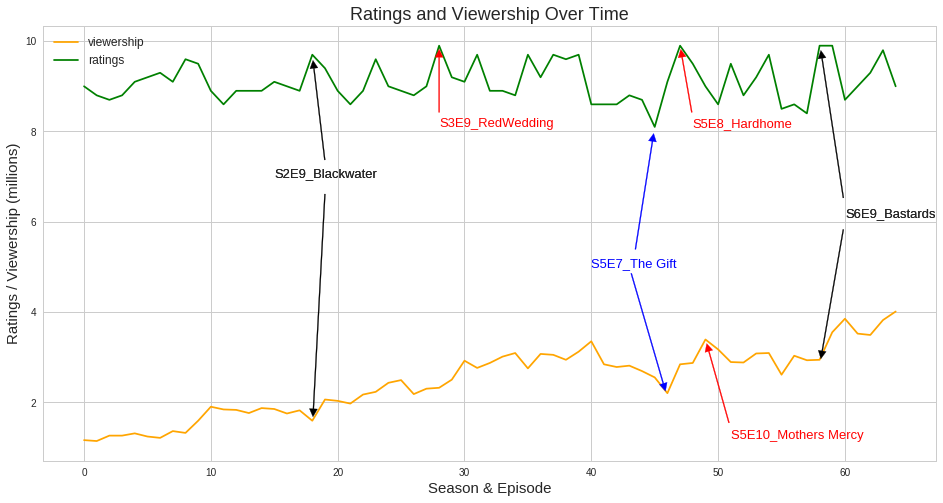

In [0]:
#Plot detrended chart:
x = gb.index[:65]
y = gb['viewer_detrend (Y/T=SI)'][:65]
z = gb['Ratings'][:65]

sns.set_style("whitegrid")

fig = plt.figure(figsize=(16,8))
plt.plot(x, y, color='orange', label='viewership')
plt.plot(x, z, color='green', label='ratings')

plt.title("Ratings and Viewership Over Time", size=18)
plt.xlabel("Season & Episode", size=15)
plt.ylabel("Ratings / Viewership (millions)", size=15)

#Adding legend
plt.legend(fontsize=12)

#Adding arrows and texts:
ax = fig.add_subplot(111)

#season 2:
ax.annotate('S2E9_Blackwater', xy=(18, 9.7), xytext=(15, 7), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S2E9_Blackwater', xy=(18, 1.4), xytext=(15, 7), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)
#season 3:
ax.annotate('S3E9_RedWedding', xy=(28, 9.9), xytext=(28, 8.1), color='red', fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor='red',shrink=0.05, width=1, headwidth=8,headlength=8),)
#season 5:
ax.annotate('S5E8_Hardhome', xy=(47, 9.9), xytext=(48, 8.1), color='red', fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S5E10_Mothers Mercy', xy=(49, 3.4), xytext=(51, 1.2), color='red', fontsize=13,
            arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S5E7_The Gift', xy=(45, 8.1), xytext=(40, 5), color='blue', fontsize=13,
            arrowprops=dict(facecolor='blue', edgecolor='blue', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('', xy=(46, 2.1), xytext=(43, 5), fontsize=13,
            arrowprops=dict(facecolor='blue', edgecolor='blue', shrink=0.05, width=1, headwidth=8,headlength=8),)
#season 6:
ax.annotate('S6E9_Bastards', xy=(58, 9.98), xytext=(60, 6.1), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)
ax.annotate('S6E9_Bastards', xy=(58, 2.8), xytext=(60, 6.1), fontsize=13,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8,headlength=8),)

### Understanding the information behind the chart :

#### Episodes Having High Ratings But Low Viewership: [Black Labels]  
 
- **S2E9 - Battle of Blackwater:** 
    * [Rating]: One of the BEST in the series - "GoT delivers a thrilling tour de force in 'Blackwater,' an epic hour of blockbuster television full of spectacular battle sequences and equally powerful drama."
    * [Viewership]: Big drop due to Memorial Day Holiday.
    
- **S6E9 - Battle of the Bastards:** 
    * [Rating]: One of the BEST in the series - “'Battle of the Bastards' delivered one of the greatest battle sequences in the show's history, and some savagely satisfying vengeance as well." 
    * [Viewership]: Drop due to competition with 2016 NBA Finals. 

(*Sources:* Blackwater: https://en.wikipedia.org/wiki/Blackwater_(Game_of_Thrones); Battle of the Bastards: https://en.wikipedia.org/wiki/Battle_of_the_Bastards)


#### Episodes Having High Ratings And Viewership:  <font color='red'>[Red Labels]</font>  
  
- **S3E9 - Red Wedding:**  
    * [Rating]: One of the BEST in the series - "The most unforgettable episode of Game of Thrones thus far, 'The Rains of Castamere' (or as it shall forever be known, 'The Red Wedding') packs a dramatic wallop that feels as exquisitely shocking as it does ultimately inevitable."
    * [Viewership]: Ranked as the highest-rated broadcast of the week.
    
- **S5E8 - Hardhome:** 
    * [Rating]: THE BEST - "Following several episodes of setup, 'Hardhome' blends a sharp script with spectacular blockbuster action to offer viewers a powerful, game-changing payoff."
    * [Viewership]: Ranked as the highest-rated broadcast of the week.

- **S5E10 - Mother's Mercy:**
    * [Rating]: Critical acclaim - "wraps up a particularly dark Game of Thrones season with a finale that delivers strong character work and a handful of appropriately bleak cliffhangers."
    * [Viewership]: Ranked as the highest-rated broadcast of the week.

(*Sources:* The Red Wedding: https://en.wikipedia.org/wiki/The_Rains_of_Castamere ; Hardhome: https://en.wikipedia.org/wiki/Hardhome ; Mother’s Mercy: https://en.wikipedia.org/wiki/Mother%27s_Mercy)


#### The Weakest Season With Episode Having Both Low Ratings And Viewership: <font color='blue'>[Blue Labels]</font>  
   
- **Season 5:** 
    * It’s no secret that Game of Thrones made a mess of its Dorne subplot, and with the quick and early deaths of the Sand Snakes in season 7, it’s clear that the showrunners want to end its story and completely forget about it. It’s one of the main reasons why most people view season 5 as the series’ weakest. While many grumble about the abysmal depiction of the Sand Snakes and absurd decisions made by Ellaria Sand, what truly condemns the plotline in the TV series is how much it fails to capture the truly engaging storyline of the books.  

- **S5E7 - The Gift:**
    * [Rating]: Critical acclaim - “'The Gift' is a jam-packed installment that delivers long-awaited plot turns in a satisfying manner, even though it continues a disturbing theme from the previous episode.”
    * [Viewership]: Biggest drop - backlash from the rape scene in "Unbowed, Unbent, Unbroken". Some viewers even expressed that they would stop watching Game of Throne due to its moral issues.
  
(*Source:* The Gift: https://en.wikipedia.org/wiki/The_Gift_(Game_of_Thrones))

### Conclusion:
In general, it is obvious that episodes having more dramatic storylines and battles tend to have higher ratings and critical reviews. And for viewership, except showtime conflicts with federal holidays and other big social events, eventful episodes tend to have higher viewership. But episodes with controversial moral issues will definitely faced backlash from some viewers, and this could be one area that Game of Throne writers could consider in order to keep the viewership from dropping in the future.  




---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**After seeing that controversial events and plot direction affected viewers’ and critics’ reception of the series, we decided to delve into fans’ opinions of both the major houses and individual characters.**

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------



## Finding 2: Moral Ambiguity at the House and Character Level 
In this finding, we use betrayals as a proxy for moral ambiguity in both houses and characters in Game of Thrones.


### Goal, Questions, Metrics:  

**Goal**  
The goal of this finding is to explore betrayals inflicted and suffered at both the house and character level, and compare this to fan favorite data, to see how fans react to betrayals in Game of Thrones, as well as to extract insights about the TV series itself.

**Questions**  
1) Is there a pattern/clear difference in betrayals (suffered & inflicted) among fan-chosen heroes and villains?  

2) Is there a  pattern/clear difference in betrayals (suffered & inflicted) among fan-favorite houses? Which houses are the most or least morally ambiguous when it comes to betrayals?  

3) Does Game of Thrones deserve its reputation as a TV series notable for its moral ambiguity?

**Metrics**  
To answer these questions and acheive this goal, we plotted betrayals data in various bar graphs at both the house and character level.  We used number of betrayals, ratio of betrayals inflicted to betrayals suffered, and fan surveys to measure popularity and moral ambiguity. 

### Betrayals of Heroes and Villains of Game of Thrones (character level)

**Tableau Public Link**:
https://public.tableau.com/profile/sydney.akers#!/vizhome/GameofThronesHeroesandVillains/MoralAmbiguity

**Rationale**:

As viewers of Game of Thrones, we know that the TV series has a reputation for moral ambiguity.  From season 1’s shocking death of the virtuous Ned Stark to the questionable political moves and vicious betrayals perpetrated by heroes and villains alike, Game of Thrones fans are accustomed to the moral gray areas often eschewed by the fantasy genre.  As Mark Dunbar notes that in more traditional fantasy universes, "redemption is inevitable, impossible, or undesirable. In Martin’s fictional universe, redemption is simply something struggled toward“ (https://thehumanist.com/arts_entertainment/culture/moral-ambiguity-game-thrones) Thus, we thought it would be nice to confirm this with data on fans’ favorite heroes and villains and the betrayals inflicted and betrayals suffered over the course of the series.  We expected to see the heroes, who are just as ensconced in the intricate politics of the Seven Kingdoms as the villains, to have perpetrated similar numbers of betrayals; however, this is not the case.  The villains clearly have betrayed more often than the heroes throughout Game of Thrones, which is a much more traditional (genre-wise at least) breakdown of betrayals: the villains scheme and betray, while the heroes remain more morally pure. We thought this was surprising considering the reputation of the series--fans’ still look to virtuous heroes and slimy villains.  

**Data Wrangling**: 

The betrayals dataset was from venngage's dataset (https://docs.google.com/spreadsheets/d/1yfzwRZFY08EBgwfMYTY8BojB4GIfsOBLo0PQ2Hs8u5g/edit#gid=0), and the data on fans’ picks for top heroes and top villains was from a Rotten Tomatoes survey (https://editorial.rottentomatoes.com/article/game-of-thrones-viewer-survey/).  We filled in last names on the betrayals dataset so that it would be easier to join on other datasets and group by character.  See betrayal.csv and HeroesandVillains.csv for the data used.  

**Tableau**:

We did a left join (HeroesandVillains.csv joined with betrayal.csv) on Character and Perpetrator for the Betrayals Inflicted visualization and a left join on Character and Victim for the Betrayals Suffered visualization.  

Betrayals Inflicted: 
We created a group from “Hero or Villain?” and a subgroup from “Perpetrator.”  Then we placed those groups on the columns, and SUM(Number of Records) on the rows.  We hid the field labels for columns, changed the visualization title, and changed the axis title to “Number of Betrayals.”  Then we sorted the bars descending by group.  We converted rank to a dimension and dragged that to color.  We changed the colors for each rank to mimic the prize ribbon color system.  

Betrayals Suffered: 
We created a group from “Hero or Villain?” and a subgroup from “Victim”.  Then we placed those groups on the columns, and CNT(Impact) on the rows.  We hid the field labels for columns, changed the visualization title, and changed the axis title to “Number of Betrayals”.  Then we sorted the bars descending by group.  We converted rank to a dimension, and dragged that to color.  We changed the colors for each rank to mimic the prize ribbon color system.  

Combined Visualization: 
We created a dashboard with these two visualizations, removed one of the rank legends, added a title, added some explanation captions, and a caption for source citing.  

**Improvements**:

We found spelling inconsistencies for characters' names in our dataset, and correcting them resulted in changes for Daenerys (whoever created the dataset spelled her name "Daenerys" in some places and "Daenarys" in others. We thought it was odd that the graph showed she was never betrayed when she definitely has been). This made it clear that the top four heroes and villains actually were betrayed in similar amounts, and that the major difference between heroes and villians was in the number of betrayals they perpetrated. 

Thus, we decided to show aggregate level data for the heroes and and villains, as well as individual data for betrayals inflicted only. 

Instead of encoding the rank with different colors, we just left the information on the side in a caption, following the "overview first, details on demand" principle. Instead, we changed the color to represent the hero/villain category. 

We also changed the title to make the narrative a bit clearer, and revised the explanatory caption. 

We took steps to polish the graph by making sure the source information was correct and complete in a caption.


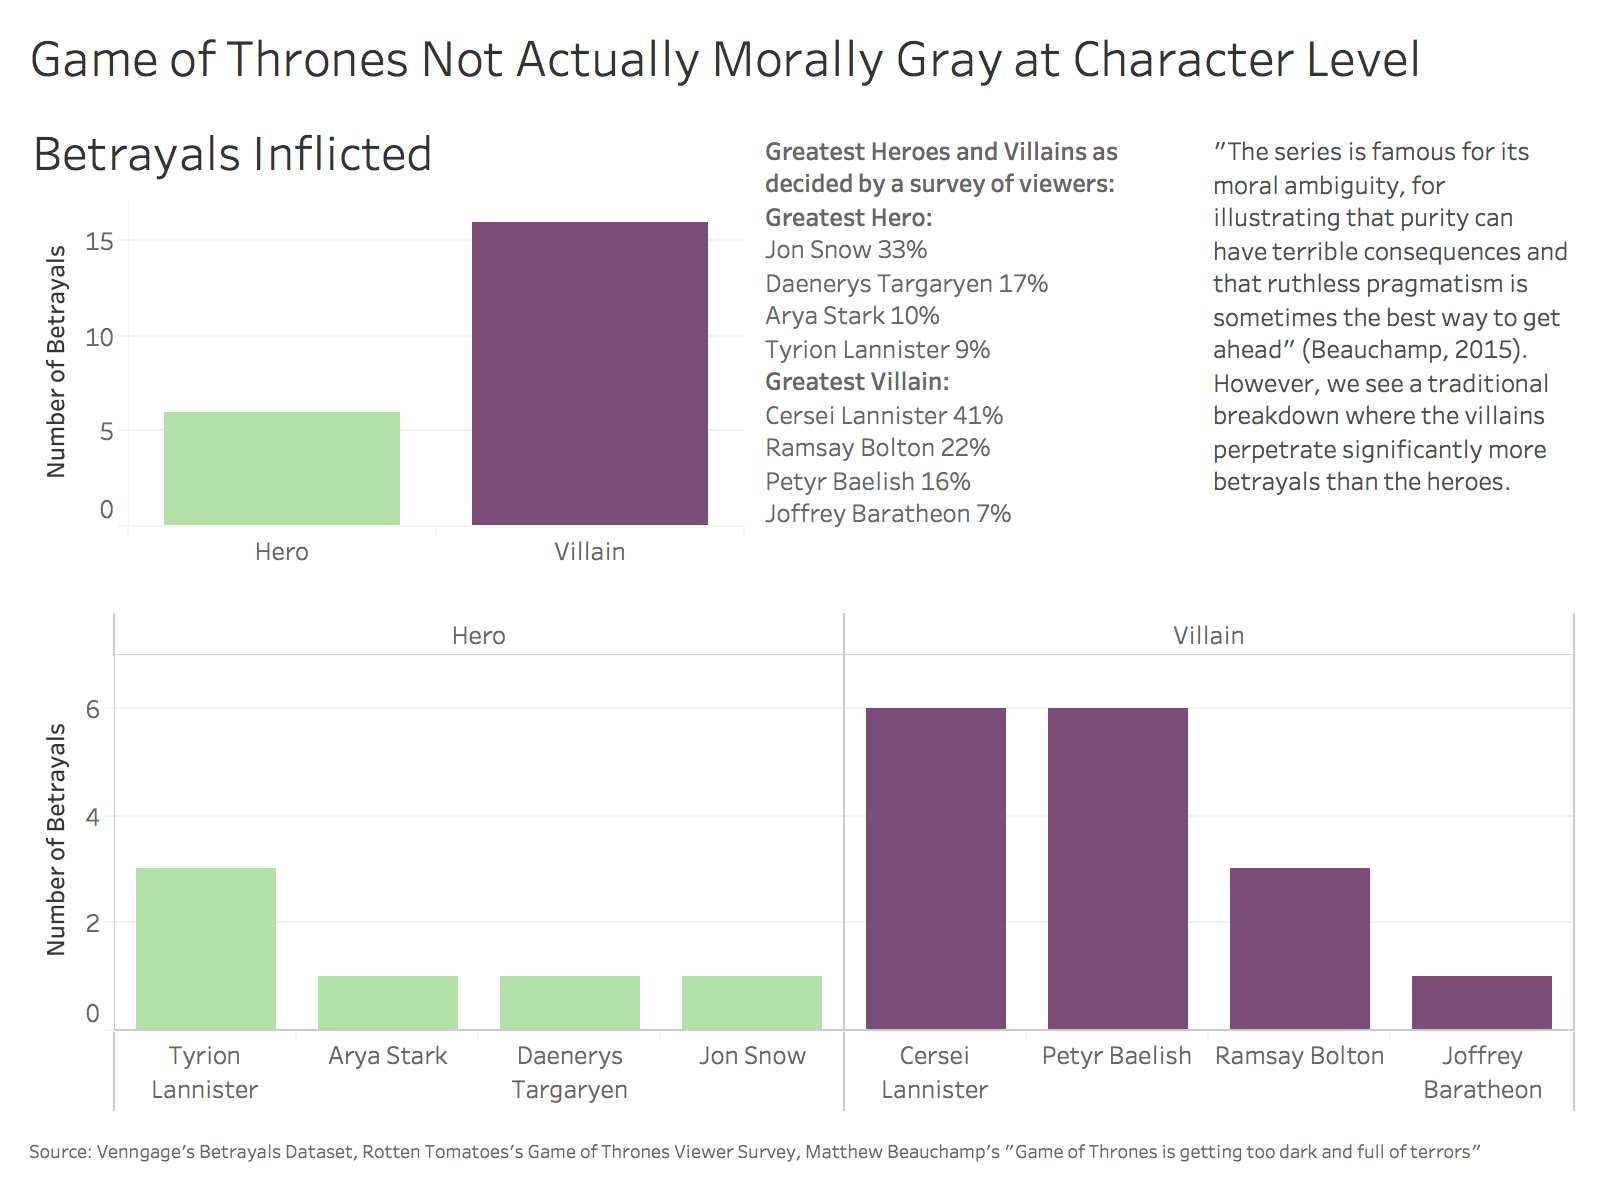

In [0]:
from IPython.display import Image

Image("CharacterBetrayalsRevised.png")

### Betrayals of House of Game of Thrones (house level)

**Rationale**:

Besides the character level of betrayals, viewers of Game of Thrones might also be curious about the house level betrayals. For instance, people might have impressions that Lannisters are the most morally ambiguous house and that the Starks are the most "pure" and innocent house.  In order to determine whether or not this is true, we want to visualize which house was involved in the most betrayals, which houses inflicted more betrayals than they suffered, and which houses are the most morally ambiguous. We also want to connect the betrayals findings with which of these houses are fan favorites.
              
**Data Wrangling**: 

The betrayals dataset was from Venngage's dataset (https://docs.google.com/spreadsheets/d/1yfzwRZFY08EBgwfMYTY8BojB4GIfsOBLo0PQ2Hs8u5g/edit#gid=0), and the data on fans’ picks for top favorite house survey (https://www.ranker.com/crowdranked-list/best-game-of-thrones-houses?utm_expid=16418821-409.ZHh11RFyTNmO_Mn5KtBY8w.0&utm_referrer=https%3A%2F%2Fwww.google.com%2F). We used group by function to arrange the data into house level and then inner merge them to a new dataframe. Besides the count numbers of betrayals, we calculated two different ratios for different purpose: 1: Betrayal ratio: count of times of got betrayed divided by the sum of got betrayed and betrayed . 2: Betrayed more often or less often ratio: count of times of betrayed minus times of got betrayed, then divided by times of got betrayed.
We exported the data to an excel file and then filled in the votings for favorite house manually. Finally we got a betrayal_by_house.csv file.

**Tableau**:

Total betrayal events:
We put the house into rows and then put perp count and victim count into columns.
Reversed the axis to compare the same house into 2 different senarios.
Change the color to red for betrayed and blue for got betrayed.

Betrayed more often or less often ratio graph: 
We put the house into columns and the ratio into the row.
Set 2 sets for adding different colors.

Betrayal ratio graph: 
We put the house into columns and the ratio into the row.
Put the votings into colors.
Set the color into red blending into blue for better contrast.

Combined Visualization: 
We created a dashboard with these three visualizations, added a title, added some explanation captions, and a caption for source citing.  

**Improvements**: 
We found there are two graphs indicating betrayal ratio, so we decided to choose one of them. Also, in order to provide meaning to the betrayal ratio, we changed it to betrayal inflicted over betrayal suffered and we add a line to emphasize those houses which betrayed more.
Besides, we found the color gradient is difficult to read, we changed it to the top 3 popular house and top 3 least popular house by using two different colors.
After the presentation, we received the feedback that there were too many colors in this data product, so we deleted the highlight of "the most bad house Baelish" in our graph to make everything simple and neat.


In [0]:
#read data
betrayal = pd.read_csv('https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/betrayal.csv', index_col=0)
betrayal.head()

,Season,Episode,Perpetrator,Perp Role,Perp House,Perp Gender,Victim,Relationship Perp-Victim,Victim Role,Victim House,Victim Gender,Perp Gain/Reasoning,Immediate Consequence,#Deaths,Geography,Impact,Notes
Betrayal,,,,,,,,,,,,,,,,,
Daenerys sold to Drogo,1,1,Varys,Master of Whisperers,Targaryen,M,Viserys Targaryen,Ally,Heir to House Targaryen,Targaryen,M,Power,Gain Ally,NaN,Across the Narrow Sea,1.0,NaN
Daenerys sold to Drogo,1,1,Viserys Targaryen,Heir to House Targaryen,Targaryen,M,Daenerys Targaryen,Brother,Heir to House Targaryen,Targaryen,F,Power,Gain Ally,NaN,Across the Narrow Sea,1.0,NaN
Sets Starks against Lannisters,1,1,Lysa Arryn,Lady Regent of the Vale,Arryn,F,Catelyn Starck,Sister,Wife of Ed Stark,Stark,F,Love,Set Starks against Lannisters,1,Winterfell,1.0,NaN
Cersei-Jaime Affair,1,1,Cersei Lannister,Queen (formerly),Lannister,F,Robert Baratheon,Wife,Lord of the Seven Kingdoms,Baratheon,M,Love,Rumors are circulating,NaN,"King's Landing, 7 Kindoms",2.0,NaN
Lysa poisons Jon,1,1,Lysa Arryn,Lady Regent of the Vale,Arryn,F,Jon Arryn,Wife,Hand of King,Arryn,M,Love,Power Change,1,"King's Landing, 7 Kindoms",1.0,NaN


In [0]:
#group by house
betrayal = betrayal[['Perp House', 'Victim House']]
perp = betrayal.groupby('Perp House').count().rename(columns={'Victim House': 'Perp Count'}).reset_index()
victim = betrayal.groupby('Victim House').count().rename(columns={'Perp House': 'Victim Count'}).reset_index()
print perp.head()
print victim.head()

#Merge perp house with victim house into one dataframe
result = perp.merge(victim, how='inner', left_on = ['Perp House'], right_on = ['Victim House'])
result = result.drop('Victim House', axis=1).rename(columns={'Perp House': 'House'})

#Add betrayal ratio
result['ratio'] = (result['Perp Count']) / (result['Victim Count'])

  Perp House  Perp Count
0          -           2
1          ?           1
2      Arryn           2
3    Baelish           6
4  Baratheon           7
  Victim House  Victim Count
0        Arryn             4
1      Baelish             1
2    Baratheon            10
3       Bolton             5
4     Freefolk             1


In [0]:
#export to excel file
# result.to_excel('result.xlsx')

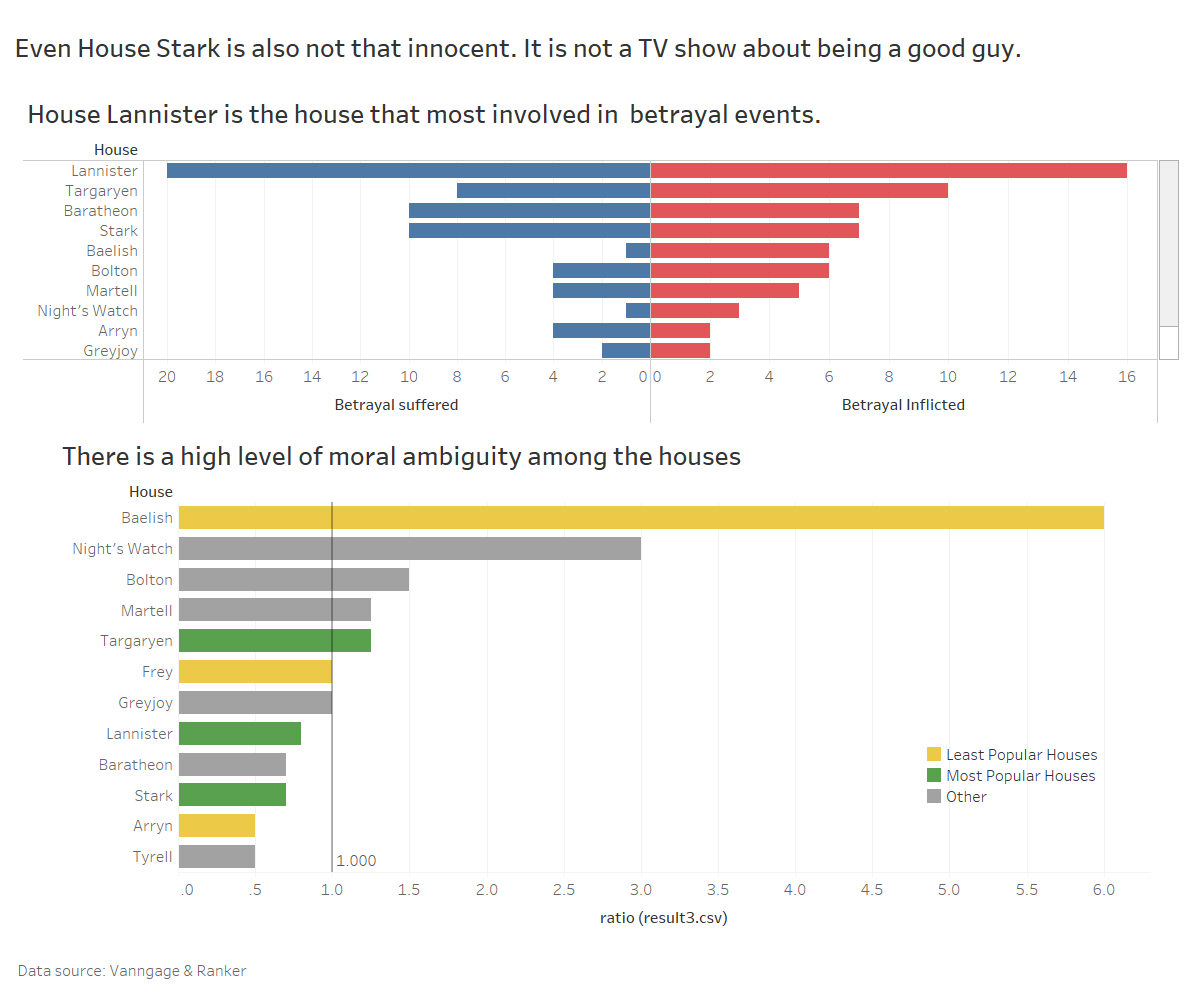

In [0]:
#Result after Tableau:
from IPython.display import Image
Image("final_house.png")

### Finding 2 Results:
We found that at the house level, there is a high degree of moral ambiguity, but clearer moral distinctions between fan-chosen heroes and villains. At the house level, we found that while the members of House Stark are often considered to be the protagonists of the series (especially in earlier seasons) and was voted one of the most popular houses by fans, House Stark is not the most innocent in terms of inflicting betrayals.  However, at the character level, villains clearly perpetrate more betrayals than do heroes, with the greatest villain (tied for) inflicting the most betrayals, and the greatest hero (tied for) inflicting the least betrayals.

## Finding 3: Popularity of Main Characters and Gender Perceptions

### Goal, Questions, Metrics:  

**Goal**  
We would like to look at the popularity of each main character using survey data we found from Reddit.

**Question**  
1) Which main characters are the most popular among fans and which are the least popular?<br>
2) Are there any trends in character popularity?

**Metrics**  
We used the raw survey data to create a new metric, which is the number of "favorite" votes divided by number of "least favorite" votes per character.

**The Making Of:**

The data for this graph is from a Reddit survey taken in January 2017 based on the book, "A Song of Fire and Ice", which the TV show "Game of Thrones" was adapted from.  We couldn't find full survey results based on the TV show itself, but this survey only includes people who both read the books and watch the show, and most voters felt that these main characters were well-adapted from the book to the show (this data is also available in the same survey).  For these reasons, we felt that it was logical to extrapolate the results to the TV show as well.  The Reddit post linking to the survey results is: https://www.reddit.com/r/asoiaf/comments/5nphj8/spoilers_extended_results_for_the_survey_from_jan/

The actual survey results data is in Google Forms here: https://docs.google.com/forms/d/e/1FAIpQLSeH-ub0yPsYmtbx0pSFknIEwJNC_eev9788ARZO72KQPACgLg/viewanalytics

Because the format of the Google Forms results was not a spreadsheet, the numbers (which came already aggregated by character) were manually entered into an Excel CSV file.  We are just interested in the main characters, so the main characters' names and each of their votes for "most liked" and "least liked" were added to the CSV.

Next, the data was read into Python and we created a new 'ratio' column representing the "most liked" votes divided by "least liked" votes, which is a metric for popularity.  Then this ratio for each character was shown in a barplot.  The plot showed that popularity differs significantly between the genders, so then the genders were color-coded in the barplot and a 'Gender' column was added to the original CSV file.

Finally, to format the plot better, the dataframe was sorted in descending order by the "ratio" column and the plot code was rerun to create the ordered bar chart.  Additionally matplotlib code was included to create a custom legend to specify what the bar colors mean. 

In [0]:
surv = pd.read_csv("https://raw.githubusercontent.com/allisonyanc/Viz-Group-Project/master/GoT_char_survey.csv")

surv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
Character            14 non-null object
Votes Liked Most     14 non-null int64
Votes Liked Least    14 non-null int64
Gender               14 non-null object
dtypes: int64(2), object(2)
memory usage: 520.0+ bytes


In [0]:
#create a ratio of likes to dislikes

surv['ratio'] = surv['Votes Liked Most']/surv['Votes Liked Least']


In [0]:
#sort df by ratio column

surv = surv.sort_values(by='ratio', ascending = False, axis = 0)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


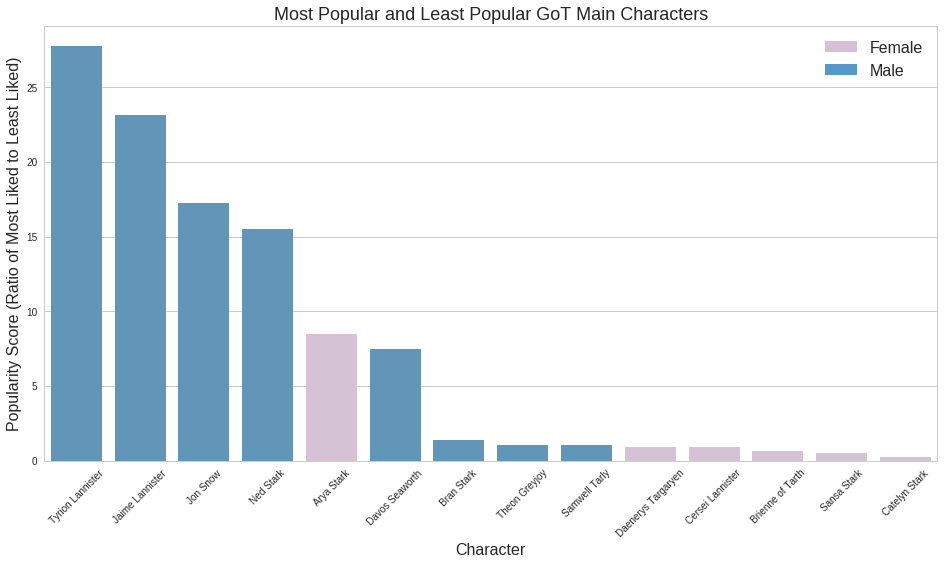

In [0]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
clrs = ['#5499C7', '#5499C7', '#5499C7', '#5499C7', '#D8BFD8', '#5499C7', '#5499C7', '#5499C7', '#5499C7', '#D8BFD8', '#D8BFD8', '#D8BFD8', '#D8BFD8', '#D8BFD8']

g_ratio = sns.barplot(x=surv["Character"], y=surv['ratio'], palette=clrs)
g_ratio.set_xticklabels(g_ratio.get_xticklabels(), rotation=45)
plt.title("Most Popular and Least Popular GoT Main Characters", fontsize=18)
plt.ylabel("Popularity Score (Ratio of Most Liked to Least Liked)", fontsize=16)
plt.xlabel("Character", fontsize=16)

# Create legend
import matplotlib.patches as mpatches

classes = ["Female", "Male"]
colors = ['#D8BFD8', '#5499C7']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc='best', prop={'size': 16})

**Finding 3 Results:**

In the plot above, female characters are represented with lavender bars and males are represented with blue bars.  From the barplot of the ratios of favorite versus least favorite votes for each major character, we can see that Tyrion and Jaime are the best liked characters, since their ratios are the highest.  It's also interesting to note that aside from Arya, all the female leads have very low ratios (also note that Arya one of the most masculine of the female characters).  In contrast, the male leads are relatively well-liked, even though they generally commit similar amounts and types of crimes to their female counterparts.  This suggests that perhaps gender discrimination is prominent even for fictional characters, such as those from Game of Thrones.<br>
<br>

**The Making Of:**

The data for this graph is from a Reddit survey taken in January 2017 based on the book, "A Song of Fire and Ice", which the TV show "Game of Thrones" was adapted from.  We couldn't find full survey results based on the TV show itself, but this survey only includes people who both read the books and watch the show, and most voters felt that these main characters were well-adapted from the book to the show (this data is also available in the same survey).  For these reasons, we felt that it was logical to extrapolate the results to the TV show as well.  The Reddit post linking to the survey results is: https://www.reddit.com/r/asoiaf/comments/5nphj8/spoilers_extended_results_for_the_survey_from_jan/

The actual survey results data is in Google Forms here: https://docs.google.com/forms/d/e/1FAIpQLSeH-ub0yPsYmtbx0pSFknIEwJNC_eev9788ARZO72KQPACgLg/viewanalytics

Because the format of the Google Forms results was not a spreadsheet, the numbers were manually entered into an Excel CSV file.  We are just interested in the main characters, so the main characters' names and each of their votes for "most liked" and "least liked" were added to the CSV.

Next, the data was read into Python and we created a new 'ratio' column representing the "most liked" votes divided by "least liked" votes, which is a metric for popularity.  Then this ratio for each character was shown in a barplot.  The plot showed that popularity differs significantly between the genders, so then the genders were color-coded in the barplot and a 'Gender' column was added to the original CSV file.

## Conclusion Overall
Even for a show like Game of Thrones, the audience has some expectations that are typical of real-life situations.  Some people will still respond negatively to sensitive topics, and even fictitious TV characters may face gender bias.  Additionally, moral ambiguity might keep the audience interested, but GoT also keeps its heroes quite unambiguous.  

These insights might be not only interesting to fans of Game of Thrones interested in understanding public reception and key themes of the show, but also useful for TV writers or showrunners concerned with improving future GoT episodes or developing a new TV show.